Neural Networks and Deep Learning: Lab Assignment 4

In [ ]:
# Vision and Language task
# Load VizWiz dataset - train, validation and test

img_dir = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split = "train"
annotation_file = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split
print(annotation_file)

https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/train.json


In [ ]:
#Visualize image given a url
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
def visualize_image(image_url):
 image = io.imread(image_url)
 print(image_url)
 plt.imshow(image)
 plt.axis("off")
 plt.show()

In [ ]:
# Read the file to extract each dataset example with label
import requests
import numpy as np
split_data_train = requests.get(annotation_file, allow_redirects=True)
train_data = split_data_train.json()

In [ ]:
len(train_data)

20523

In [ ]:
## Setup feature extraction for image and text(question)

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array

import numpy as np
from PIL import Image
from urllib import request
from io import BytesIO


def extract_image_features(image_url):
    res = request.urlopen(image_url).read()
    img = Image.open(BytesIO(res)).resize((224,224))
    img_data = img_to_array(img)
    img_data = np.expand_dims(img_data, axis = 0)
    img_data = preprocess_input(img_data)
    model = VGG16(weights='imagenet', include_top = False)
    features = model.predict(img_data)
    features = features.reshape(-1)
    return features


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 5.3 MB 11.4 MB/s 
     |████████████████████████████████| 1.3 MB 51.7 MB/s 
     |████████████████████████████████| 163 kB 57.5 MB/s 
     |████████████████████████████████| 7.6 MB 68.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=723657ac47bafcd858559a8b6b35ab644dd42fe66ce3e2d648ef46e7b1a2a3f8
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

def extract_question_features(question):
 model = SentenceTransformer('paraphrase-MiniLM-L12-v2')
 features = model.encode(question)
 return features


In [ ]:
# Setup the model by passing features from image and text as multimodal feature to fc layer

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from keras import regularizers
from tensorflow.python.keras.layers.core import Dropout
from sklearn import preprocessing

num_VQs = 1500
X = [] ## features
y = [] ## target labels
count1 = 0
for vq in train_data[0:num_VQs]:
 count1 += 1
 print(count1)
 # Extract features describing the image
 image_name = vq['image']
 image_url = img_dir + image_name
 image_feature = extract_image_features(image_url)
 # Extract features describing the question
 question = vq['question']
 question_feature = extract_question_features(question)
 # Creating a multimodal feature to represent both the image and question
 multimodal_features = np.concatenate((question_feature, image_feature))
 # Prepare features and labels
 X.append(multimodal_features)
 answers = vq['answers']

 d = {}
 #choosing the most common answer of all the answers with confidence 'yes'
 for i in answers:
   if i['answer_confidence'] == 'yes':
     if i['answer'] not in d:
       d[i['answer']] = 1
     else:
       d[i['answer']] += 1
 y.append(max(d, key=d.get))




1
1/1 [==============================] - 8s 8s/step


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

2
1/1 [==============================] - 0s 108ms/step
3
1/1 [==============================] - 0s 316ms/step
4
1/1 [==============================] - 0s 110ms/step
5


1/1 [==============================] - 0s 119ms/step
6


1/1 [==============================] - 0s 133ms/step
7
1/1 [==============================] - 0s 113ms/step
8
1/1 [==============================] - 0s 110ms/step
9
1/1 [==============================] - 0s 111ms/step
10
1/1 [==============================] - 0s 113ms/step
11
1/1 [==============================] - 0s 109ms/step
12
1/1 [==============================] - 0s 122ms/step
13
1/1 [==============================] - 0s 113ms/step
14
1/1 [==============================] - 0s 110ms/step
15
1/1 [==============================] - 0s 114ms/step
16
1/1 [==============================] - 0s 111ms/step
17
1/1 [==============================] - 0s 109ms/step
18
1/1 [==============================] - 0s 113ms/step
19
1/1 [==============================] - 0s 109ms/step
20
1/1 [==============================] - 0s 428ms/step
21
1/1 [==============================] - 0s 216ms/step
22
1/1 [==============================] - 0s 110ms/step
23
1/1 [==============================] - 0s 116ms/ste

In [ ]:
# copy of train features

y_answers = y.copy()
X_feat =  X

In [ ]:
# copy of validation features

X_val_1_copy = X_val_1
y_val_copy = y_val

In [ ]:
import numpy
a = numpy.asarray(X)
numpy.savetxt("x_train.csv", a, delimiter=",")

In [ ]:
import numpy
a1 = numpy.asarray(X_val_1)
numpy.savetxt("x_valid.csv", a1, delimiter=",")

In [ ]:
import numpy
y = numpy.asarray(y)
numpy.savetxt("y_train.csv",y , delimiter=",")

In [ ]:
import numpy
y1 = numpy.asarray(y_val)
numpy.savetxt("y_valid.csv", y1, delimiter=",")

In [ ]:
answers_freq = {}
for ans in y:
  answers_freq[ans] = y.count(ans)

vocab = list(answers_freq.keys())
print(vocab)
print(len(vocab))
print(y)
print(len(y))


['basil leaves', 'unsuitable', 'tomatoes', 't36m', 'solar garden light', 'boots', 'mouthwash', 'monitor cleaning kit', 'orange', 'yes', 'phone', 'remote', 'dr pepper', 'unanswerable', 'white', '80 cents', 'air freshener', 'bottle', 'grand theft auto vice city', 'light red kidney beans', 'brides maids', 'no', 'dog', 'raiz el evento', 'toad training', 'brown yes', 'open', 'homestyle italian', 'eq02713', 'jack links', 'apple pie spice', 'sweet sour chicken', 'hulk toy', 'water bottle', 'sirloin steaks', 'upside down', 'beavis', 'jar', 'yellow grey brown color flower design', 'winnie pooh', 'blue corn tortilla chips', 'books photos speaker', 'vanilla', 'manwich', 'frequency', 'cough drops', 'minute maid coolers', 'shoe', 'mustard', 'entertainment center', 'coffee maker', 'grey', 'oak', 'tools', 'clorox', 'nestle', 'steak seasoning', 'chips', '100', 'mug', 'tablet', 'tissues', 'dark', 'ketchup', 'house blend', 'unsalted', 'pink green white', 'mailbox', 'shampoo', 'pink', 'keyboard', 'bottom

In [ ]:
for i in range(len(y)):
  y[i] = vocab.index(y[i])
print(y)
print(len(y))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 11, 12, 13, 14, 15, 16, 17, 9, 18, 1, 19, 20, 21, 22, 1, 13, 1, 23, 1, 24, 25, 9, 13, 26, 1, 13, 13, 27, 28, 29, 1, 30, 31, 1, 13, 13, 32, 33, 13, 1, 34, 35, 36, 37, 38, 13, 21, 39, 13, 40, 13, 41, 42, 13, 13, 13, 13, 43, 44, 13, 1, 45, 1, 13, 13, 46, 21, 9, 47, 9, 48, 49, 13, 50, 51, 13, 13, 13, 21, 13, 52, 53, 54, 13, 1, 55, 9, 56, 57, 1, 13, 58, 59, 60, 13, 1, 61, 13, 62, 13, 63, 10, 64, 65, 66, 67, 21, 13, 1, 1, 14, 1, 68, 13, 1, 69, 70, 71, 72, 1, 1, 73, 74, 1, 75, 13, 76, 77, 13, 1, 78, 79, 80, 81, 82, 13, 83, 84, 1, 85, 86, 13, 1, 1, 87, 13, 88, 89, 22, 90, 13, 1, 91, 92, 93, 94, 69, 95, 1, 96, 97, 1, 72, 98, 99, 100, 101, 1, 21, 13, 102, 91, 103, 1, 104, 70, 105, 13, 106, 107, 1, 1, 13, 108, 109, 110, 111, 1, 10, 112, 13, 113, 114, 13, 1, 13, 14, 115, 1, 1, 116, 13, 1, 1, 13, 117, 13, 13, 63, 13, 58, 1, 118, 119, 120, 1, 1, 14, 121, 1, 122, 123, 124, 125, 126, 1, 13, 127, 13, 1, 13, 13, 1, 128, 129, 130, 1, 131, 132, 133, 134, 135, 51, 91, 

In [ ]:
print(len(vocab))
# print(X_train.shape)

711


In [ ]:
# vocab

In [ ]:
# Feature extraction for validation set

img_dir = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split = 'val'
annotation_file_val = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split
# Read the file to extract each dataset example with label
import requests
import numpy as np
split_data_val = requests.get(annotation_file, allow_redirects=True)
val_data = split_data_val.json()

In [ ]:
len(val_data)

20523

In [ ]:
num_VQs_val = 600
X_val_1 = [] ## features
y_val = [] ## target labels
count = 0
for vq in val_data[0:num_VQs_val]:
  count += 1
  print(count)
  image_name = vq['image']
  image_url = img_dir + image_name
  image_feature_val = extract_image_features(image_url)
  question_val = vq['question']
  question_feature_val = extract_question_features(question_val)
  multimodal_features_val = np.concatenate((question_feature_val, image_feature_val))
  # Prepare features and labels
  X_val_1.append(multimodal_features_val)
  answers_val = vq['answers']

  d = {}
  #choosing the most common answer of all the answers with confidence 'yes'
  for i in answers_val:
    if i['answer_confidence'] == 'yes':
      if i['answer'] not in d:
        d[i['answer']] = 1
      else:
        d[i['answer']] += 1
  y_val.append(max(d, key=d.get))

1
1/1 [==============================] - 0s 122ms/step
2
1/1 [==============================] - 0s 115ms/step
3
1/1 [==============================] - 0s 116ms/step
4
1/1 [==============================] - 0s 118ms/step
5
1/1 [==============================] - 0s 116ms/step
6
1/1 [==============================] - 0s 119ms/step
7
1/1 [==============================] - 0s 125ms/step
8
1/1 [==============================] - 0s 118ms/step
9
1/1 [==============================] - 0s 110ms/step
10
1/1 [==============================] - 0s 116ms/step
11
1/1 [==============================] - 0s 116ms/step
12
1/1 [==============================] - 0s 113ms/step
13
1/1 [==============================] - 0s 115ms/step
14
1/1 [==============================] - 0s 110ms/step
15
1/1 [==============================] - 0s 113ms/step
16
1/1 [==============================] - 0s 122ms/step
17
1/1 [==============================] - 0s 115ms/step
18
1/1 [==============================] - 0s 111ms/step
1

In [ ]:
for i in range(len(y_val)):
 if y_val[i] in vocab:
   y_val[i] = vocab.index(y_val[i])
 else:
   y_val[i] = vocab.index('unanswerable')


In [ ]:
import tensorflow as tf
classes = len(vocab)

X_train = np.array(X)
y_train = tf.keras.utils.to_categorical(y, num_classes=classes)

X_valid = np.array(X_val_1)
y_valid = tf.keras.utils.to_categorical(y_val, num_classes=classes)


#Model 1 
from tensorflow.python.keras.layers import Dense, Flatten, Input
model_1 = Sequential()
model_1.add(Input(shape=(25472,)))
model_1.add(Dense(256, activation = "tanh"))
model_1.add(Dropout(0.5))
model_1.add(Dense(classes, activation = "softmax"))
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()
model_1.fit(X_train, y_train, batch_size=100, epochs=50, validation_data = (X_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               6521088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 711)               182727    
Total params: 6,703,815
Trainable params: 6,703,815
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 1s 23ms/step - loss: 5.6321 - accuracy: 0.1860 - val_loss: 4.6881 - val_accuracy: 0.2733
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 5.1259 - accuracy: 0.2207 - val_loss: 4.5976 - val_accuracy: 0.2800
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 5.0367 - accuracy: 

In [ ]:
import tensorflow as tf
classes = len(vocab)

X_train = np.array(X)
y_train = tf.keras.utils.to_categorical(y, num_classes=classes)

X_valid = np.array(X_val_1)
y_valid = tf.keras.utils.to_categorical(y_val, num_classes=classes)


#Model 2

from tensorflow.python.keras.layers import Dense, Flatten, Input
model_2 = Sequential()
model_2.add(Input(shape=(25472,)))
model_2.add(Dense(512, activation = "relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(classes, activation = "softmax"))
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()
model_2.fit(X_train, y_train, batch_size=120, epochs=50, validation_data = (X_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               13042176  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 711)               364743    
Total params: 13,406,919
Trainable params: 13,406,919
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 1s 31ms/step - loss: 17.5834 - accuracy: 0.0293 - val_loss: 5.4586 - val_accuracy: 0.1600
Epoch 2/50
13/13 [==============================] - 0s 19ms/step - loss: 5.9293 - accuracy: 0.1333 - val_loss: 4.7933 - val_accuracy: 0.2683
Epoch 3/50
13/13 [==============================] - 0s 19ms/step - loss: 5.3059 - accurac

In [ ]:
import tensorflow as tf
classes = len(vocab)

X_train = np.array(X)
y_train = tf.keras.utils.to_categorical(y, num_classes=classes)

X_valid = np.array(X_val_1)
y_valid = tf.keras.utils.to_categorical(y_val, num_classes=classes)


#Model 3
from tensorflow.python.keras.layers import Dense, Flatten, Input
model_3 = Sequential()
model_3.add(Input(shape=(25472,)))
model_3.add(Dense(1024, activation = "relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(classes, activation = "softmax"))
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_3.summary()
model_3.fit(X_train, y_train, batch_size=128, epochs=50, validation_data = (X_valid, y_valid))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              26084352  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 711)               728775    
Total params: 26,813,127
Trainable params: 26,813,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 1s 38ms/step - loss: 32.3562 - accuracy: 0.0353 - val_loss: 4.4152 - val_accuracy: 0.3067
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 5.0796 - accuracy: 0.1940 - val_loss: 3.7344 - val_accuracy: 0.3967
Epoch 3/50
12/12 [==============================] - 0s 20ms/step - loss: 4.2999 - accurac

In [ ]:
from sklearn.metrics import average_precision_score

y_pred1 = model_1.predict(X_valid)
y_pred2 = model_2.predict(X_valid)
y_pred3 = model_3.predict(X_valid)


In [ ]:
y_pred1_list = []
for i in y_pred1:
  k = max(i)
  if k > 0.5:
    y_pred1_list.append(1)
  else:
    y_pred1_list.append(0)


y_pred2_list = []
for i in y_pred2:
  k = max(i)
  if k > 0.5:
    y_pred2_list.append(1)
  else:
    y_pred2_list.append(0)


y_pred3_list = []
for i in y_pred3:
  k = max(i)
  if k > 0.5:
    y_pred3_list.append(1)
  else:
    y_pred3_list.append(0)




In [ ]:
from sklearn.metrics import average_precision_score

#All answers
gtlist = [x['answerable'] for x in val_data]
gtlist = gtlist[0:600]
# len(gtlist)

average_precision1 = average_precision_score(gtlist, y_pred1_list)
average_precision2 = average_precision_score(gtlist, y_pred2_list)
average_precision3 = average_precision_score(gtlist, y_pred3_list)

print("AP for model 1: {}".format(round(100*average_precision1, 4)))
print("AP for model 2: {}".format(round(100*average_precision2, 4)))
print("AP for model 3: {}".format(round(100*average_precision3, 4)))


AP for model 1: 61.2851
AP for model 2: 61.6425
AP for model 3: 65.8464


In [ ]:
# The best model is Model 3 based on high average precision, low valiation loss and high validation accuracy
# use this model to predict the results for test set


img_dir = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"
split = 'test'
annotation_file_val = "https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split
# Read the file to extract each dataset example with label
import requests
import numpy as np
split_data_test = requests.get(annotation_file, allow_redirects=True)
test_data = split_data_test.json()


In [ ]:
num_VQs_test = 1000
X_test = [] ## features
y_test = [] ## target labels
count = 0
for vq in test_data[0:num_VQs_test]:
  count += 1
  print(count)
  image_name = vq['image']
  image_url = img_dir + image_name
  image_feature_test = extract_image_features(image_url)
  question_test = vq['question']
  question_feature_test = extract_question_features(question_test)
  multimodal_features_test = np.concatenate((question_feature_test, image_feature_test))
  # Prepare features and labels
  X_test.append(multimodal_features_test)
  answers_test = vq['answers']

  d = {}
  #choosing the most common answer of all the answers with confidence 'yes'
  for i in answers_test:
    if i['answer_confidence'] == 'yes':
      if i['answer'] not in d:
        d[i['answer']] = 1
      else:
        d[i['answer']] += 1
  y_test.append(max(d, key=d.get))

1
1/1 [==============================] - 0s 117ms/step
2
1/1 [==============================] - 0s 112ms/step
3
1/1 [==============================] - 0s 112ms/step
4
1/1 [==============================] - 0s 116ms/step
5
1/1 [==============================] - 0s 112ms/step
6
1/1 [==============================] - 0s 122ms/step
7
1/1 [==============================] - 0s 114ms/step
8
1/1 [==============================] - 0s 112ms/step
9
1/1 [==============================] - 0s 122ms/step
10
1/1 [==============================] - 0s 114ms/step
11
1/1 [==============================] - 0s 111ms/step
12
1/1 [==============================] - 0s 120ms/step
13
1/1 [==============================] - 0s 111ms/step
14
1/1 [==============================] - 0s 118ms/step
15
1/1 [==============================] - 0s 129ms/step
16
1/1 [==============================] - 0s 117ms/step
17
1/1 [==============================] - 0s 117ms/step
18
1/1 [==============================] - 0s 118ms/step
1

In [ ]:
import numpy
a2 = numpy.asarray(X_test)
numpy.savetxt("x_test.csv", a2, delimiter=",")

In [ ]:
for i in range(len(y_test)):
 if y_test[i] in vocab:
   y_test[i] = vocab.index(y_test[i])
 else:
   y_test[i] = vocab.index('unanswerable')

X_test_1 = np.array(X_test)

In [ ]:
import numpy
y2 = numpy.asarray(y_test)
numpy.savetxt("y_test.csv",y2 , delimiter=",")

In [ ]:
# Run best model - model 3 on the test set

y_pred = model_3.predict(X_test_1)
y_pred

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06847819e-25, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.40924422e-13, 2.68168387e-05, 9.98288691e-01, ...,
        7.85421775e-22, 4.36671765e-09, 1.11129862e-16],
       ...,
       [2.32388161e-30, 1.46854821e-21, 1.09291185e-35, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.52072111e-37, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.58027174e-08, 8.49007629e-03, 1.09325962e-08, ...,
        5.07240916e-09, 4.04370367e-05, 1.03961319e-10]], dtype=float32)

In [ ]:
conf_list = []
for i in y_pred:
  k = max(i)
  conf_list.append(k)


In [ ]:
import pandas as pd    

df = pd.DataFrame(conf_list)
df.to_csv('results.csv', index=False, header=False)


In [ ]:
# Plot loss curves for model 3 for training and validation data

import matplotlib.pyplot as plt

history3 = model_3.fit(X_train, y_train, batch_size=128, epochs=50, validation_data = (X_valid, y_valid))



Epoch 1/50
12/12 [==============================] - 0s 31ms/step - loss: 1.5218 - accuracy: 0.7340 - val_loss: 0.2841 - val_accuracy: 0.9400
Epoch 2/50
12/12 [==============================] - 0s 31ms/step - loss: 1.4205 - accuracy: 0.7393 - val_loss: 0.3125 - val_accuracy: 0.9417
Epoch 3/50
12/12 [==============================] - 0s 31ms/step - loss: 1.4646 - accuracy: 0.7507 - val_loss: 0.3117 - val_accuracy: 0.9400
Epoch 4/50
12/12 [==============================] - 0s 35ms/step - loss: 1.4718 - accuracy: 0.7453 - val_loss: 0.2636 - val_accuracy: 0.9450
Epoch 5/50
12/12 [==============================] - 0s 31ms/step - loss: 1.5089 - accuracy: 0.7480 - val_loss: 0.2591 - val_accuracy: 0.9500
Epoch 6/50
12/12 [==============================] - 0s 35ms/step - loss: 1.5302 - accuracy: 0.7367 - val_loss: 0.2803 - val_accuracy: 0.9467
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 1.4274 - accuracy: 0.7460 - val_loss: 0.2622 - val_accuracy: 0.9483
Epoch 8/50
12

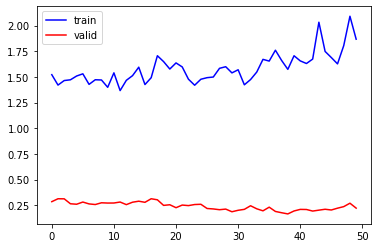

In [ ]:
plt.plot(history3.history["loss"], color = "blue", label = "train")
plt.plot(history3.history["val_loss"], color = "red", label = "valid")
plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
